# Домашнее задание "Продвинутая линейная алгебра".

### Уровень 0:

Придумайте матрицы, которые обладают следующими свойствами:

a) Диагональная, ортогональная, но не единичная(!)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
# Диагональная, ортогональная, но не единичная(!)
A = np.array([ [-1,0,0], [0,-1,0], [0,0,-1] ])

In [30]:
# ортогональная проверка
AT = A.transpose()
A @ AT

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

b) Верхнетреугольная, ортогональная

In [31]:
A = np.array([ [-1,0,0], [0,-1,0], [0,0,-1] ])
A

array([[-1,  0,  0],
       [ 0, -1,  0],
       [ 0,  0, -1]])

In [32]:
AT = A.transpose()
AT

array([[-1,  0,  0],
       [ 0, -1,  0],
       [ 0,  0, -1]])

In [33]:
A@AT

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

c) Нижнетреугольная, ортогональная

In [34]:
A = np.array([ [-1,0,0], [0,-1,0], [0,0,-1] ])
A

array([[-1,  0,  0],
       [ 0, -1,  0],
       [ 0,  0, -1]])

In [35]:
AT = A.transpose()
A@AT

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

d) Матрица, у которой определитель = 1, и все элементы не равны 0

P.S. Во всех пунктах ответом должна быть ненулевая матрица размерности не менее 2!

In [48]:
print('\n Sir, Task is recieved: ', )    
for x in np.arange(1,10,0.1):
    A = np.array([ [5,0,x], [0,3,0], [5,0,7] ])
    print('.',end='')
    if np.linalg.det(A) == 1: break
print('\n Sir, \n Task is finished: \n', A)    


 Sir, Task is recieved: 
..........................................................................................
 Sir, 
 Task is finished: 
 [[5.  0.  9.9]
 [0.  3.  0. ]
 [5.  0.  7. ]]


Найдите собственные значения и собственные вектора матриц:

```
m = np.array([[2, 2],
              [1, 3]])
print(m)
```

In [56]:
m = np.array([[2, 2],
              [1, 3]])
print(m)

[[2 2]
 [1 3]]


In [127]:
# найдем собственный вектор(ню) и собственное значение (лямбда)
lambda_, nu  = np.linalg.eig(m)
lambda_, nu

(array([1., 4.]),
 array([[-0.89442719, -0.70710678],
        [ 0.4472136 , -0.70710678]]))

In [126]:
# проверка  A*nu = nu*lambda
for i in range(len(m)):
    left_ = m[:,:] @ nu[:,i]
    right_ = lambda_[i] * nu[:,i]
    print( f'm * nu[:,{i}] = {left_},\nlambda_[{i}] * nu[:,{i}] = {right_}   ')
    #if ( left_ == right_): print('True')

m * nu[:,0] = [-0.89442719  0.4472136 ],
lambda_[0] * nu[:,0] = [-0.89442719  0.4472136 ]   
m * nu[:,1] = [-2.82842712 -2.82842712],
lambda_[1] * nu[:,1] = [-2.82842712 -2.82842712]   


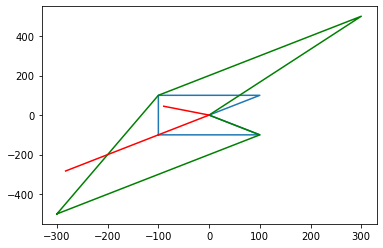

In [153]:
# визуализируем для наглядности. для примера возьмем объект из ДЗ 2.
A = [
[-100, -100, 1],
[-100, 100, 1],
[100, 100, 1],
[0, 0, 1],
[100, -100, 1],
[-100, -100, 1]
]

A = np.array(A)
x = A[:,0]
y = A[:,1]

plt.plot(x, y)

#умножение на матрицу m (зеленым)
A = A[:,:-1]
C = A @ m

x_1 = C[:,0]
y_1 = C[:,1]

plt.plot(x_1, y_1, color = 'green')

#новая система координат (красным) на базисе собственных векторов матрицы m
C = np.array(nu[:,0]) * lambda_[0] * 100
C.resize(2,2)
x_1 = C[:,0]
y_1 = C[:,1]
plt.plot(x_1, y_1, color = 'red')

C = np.array(nu[:,1]) * lambda_[1] * 100
C.resize(2,2)
x_1 = C[:,0]
y_1 = C[:,1]
plt.plot(x_1, y_1, color = 'red')


In [139]:
nu,lambda_,m

(array([[-0.89442719, -0.70710678],
        [ 0.4472136 , -0.70710678]]),
 array([1., 4.]),
 array([[2, 2],
        [1, 3]]))

### Уровень 1:


Найдите спектральное разложение матрицы:

```
m = np.array([[1, 2],
              [2,3]])
print(m)
```


In [154]:
m = np.array([[1, 2],
              [2,3]])
print(m)

[[1 2]
 [2 3]]


In [156]:
lambda_, nu = np.linalg.eig(m)
lambda_, nu

(array([-0.23606798,  4.23606798]),
 array([[-0.85065081, -0.52573111],
        [ 0.52573111, -0.85065081]]))

In [160]:
D = np.eye(2) * lambda_
D

array([[-0.23606798,  0.        ],
       [-0.        ,  4.23606798]])

Спектральное разложение(PCA) матрицы m в виде:  
m = St * D * S  
,где:

In [162]:
print(f'St = {np.transpose(nu)} ')
print(f'D = {D} ')
print(f'S = {nu} ')

St = [[-0.85065081  0.52573111]
 [-0.52573111 -0.85065081]] 
D = [[-0.23606798  0.        ]
 [-0.          4.23606798]] 
S = [[-0.85065081 -0.52573111]
 [ 0.52573111 -0.85065081]] 


In [168]:
np.transpose(nu) @ nu @ D

array([[-0.23606798,  0.        ],
       [ 0.        ,  4.23606798]])

### Постройте зависимость качества восстановления рукописных цифр (MNIST) в зависимости от различного количества компонент PCA. В качестве метрики различия предлагаю использовать MSE.*





--------------------------------------------------------------------------------

У PCA есть метод transform и inverse_transofrm. Первый - снижает размерность, второй - восстанавливает оригинальные данные с потерей информации.
Надо посчитать насколько в среднем точно восстанавливается оригинальная картинка в зависимости от количества компонент в PCA.

В качестве справки можно использовать:

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html - Документация по PCA

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html - Документация по MSE

Картинки цифр можно взять отсюда - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html


In [37]:
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()

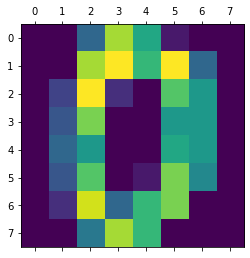

In [285]:
#Выполним для числа "0"
plt.matshow(digits.images[0]) 

In [41]:
m = digits.images[0]
m

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [38]:
from sklearn.decomposition import PCA
tester = PCA(n_components=2, svd_solver='full')

from sklearn.metrics import mean_squared_error

In [39]:
tester.set_params(n_components=2)

PCA(n_components=2, svd_solver='full')

In [42]:
A = tester.fit_transform(m)
m_ = tester.inverse_transform(A)
mean_squared_error(m,m_)

1.1688674951214155

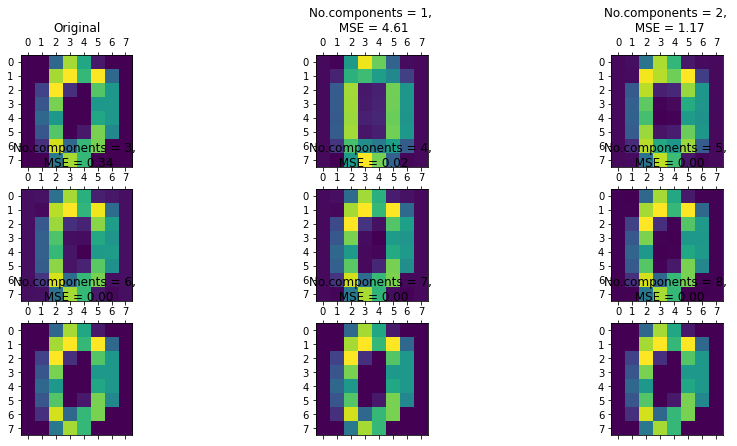

In [43]:
# визуализируем для числа "0"
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(331)
ax.matshow(m)
ax.set(title = 'Original' )
MSE_dict = dict()

for i in range(1,9,1):
    plot_number = 331 + i
    ax = fig.add_subplot(plot_number)
    tester.set_params(n_components=i)
    A = tester.fit_transform(m)
    m_ = tester.inverse_transform(A)
    MSE = mean_squared_error(m,m_)
    MSE_dict[i] = MSE
    ax.set(title = f'No.components = {i}, \n MSE = {MSE:.2f}')
    ax.matshow(m_)

### Выведем график зависимости среднеквадратичной ошибки(MSE) от количества принятых компонент (PCA)

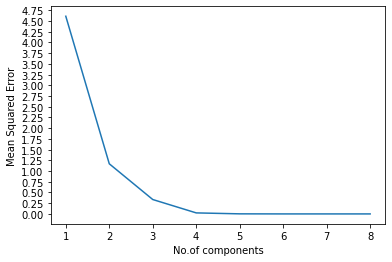

In [49]:
fig,ax = plt.subplots()
ax.plot(MSE_dict.keys(), MSE_dict.values())
ax.set(xlabel='No.of components', ylabel='Mean Squared Error', yticks=np.arange(0,5,.25));

In [259]:
# Выполним для всех чисел. Найдем минимальное количество компонентов PCA, чтобы MSE =0. все сложим в словарь "PCA_model" 
PCA_model = dict()
for i in range(0,10,1):
    
    m = digits.images[i]

    for j in range(1,9,1):
        tester.set_params(n_components=j)
        A = tester.fit_transform(m)
        m_ = tester.inverse_transform(A)
        MSE = round(mean_squared_error(m,m_),2)
        if MSE == 0: 
            PCA_model[i] = j
            break
PCA_model    

{0: 5, 1: 5, 2: 6, 3: 6, 4: 6, 5: 5, 6: 5, 7: 6, 8: 6, 9: 6}

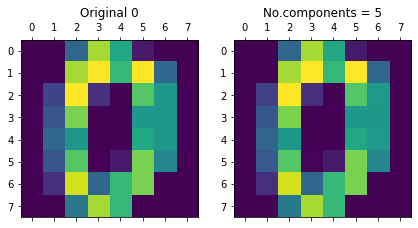

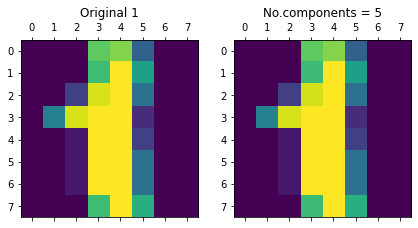

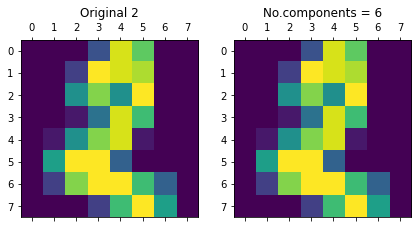

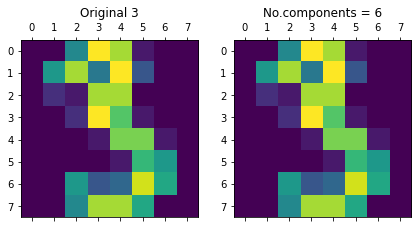

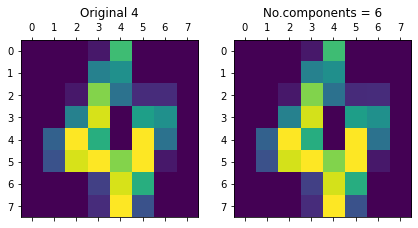

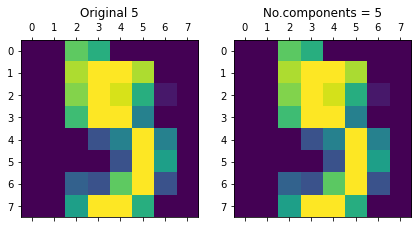

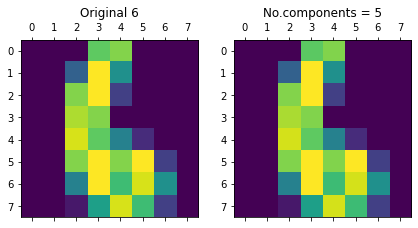

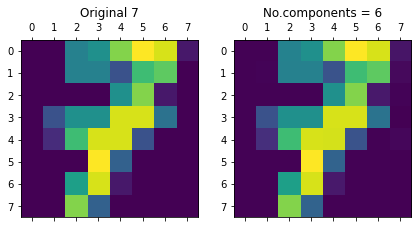

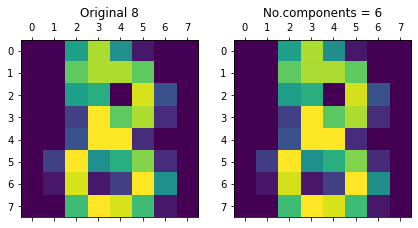

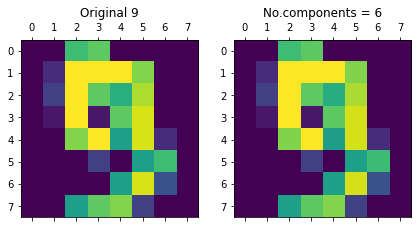

In [278]:
#визуализируем:

for i in PCA_model.keys():
    m = digits.images[i]
    fig = plt.figure(figsize=(7,6))
    ax = fig.add_subplot(121)
    ax.matshow(m)
    ax.set(title = f'Original {i}' )
    
    ax = fig.add_subplot(122)
    
    tester.set_params(n_components=PCA_model[i])
    A = tester.fit_transform(m)
    m_ = tester.inverse_transform(A)
    
    ax.matshow(m_)
    ax.set(title = f'No.components = {PCA_model[i]}')
    plt.show()
    

### Вывод  
Для каждого числа можно сократить количество признаков (столбцов) с 8 до 5-6.